In [1]:
from unidec_modules.v3_SeqChrom import *

In [2]:
eng = SeqChrom()


UniDec Engine v.5.0.1

UniDec Path: C:\Users\cm19ljc\Documents\GitHub\UniDec\unidec_bin\UniDec.exe

UniDec Engine v.5.0.1

UniDec Path: C:\Users\cm19ljc\Documents\GitHub\UniDec\unidec_bin\UniDec.exe


Added in option to load multipe mzml files into engine before metaunidec processing.

In [3]:
spectra = "C:\\Users\\cm19ljc\\OneDrive - University of Leeds\\DATA\\AccMass\\220107/processed/220107 A_340682_BE3_01_82111.d.mzML"

# spectra = "D:/220107 mass spec/processed/220721 A_340682_BE3_01_82111.d.mzML"

# spectra = "D:/220107 mass spec/processed/220107 B _340681_BD6_01_82106.d.mzML"
# spectra = "D:/220107 mass spec/processed/220721 C_340683_BE4_01_82112.d.mzML"

# spectra = "D:/220118/processed/220118 PanZ labelling A_341167_RC7_01_82179.d.mzML"
# spectra = "D:/220118/processed/220118 PanZ labelling B_341168_RD4_01_82183.d.mzML"

# spectra = "D:/220120/processed/220120 PanZ 6M B r2_341369_RB6_01_82288.d.mzML"


plate_map = "C:/Users/cm19ljc/Documents/GitHub/UniDec/reaction maps/PanZ sortase time course 1.5 eq gvseyg.xlsx"

In [4]:
eng.load_mzml(spectra, clear_hdf5=True, load_hdf5=True)

Reading mzML: C:\Users\cm19ljc\OneDrive - University of Leeds\DATA\AccMass\220107/processed/220107 A_340682_BE3_01_82111.d.mzML
[Warning] Not index found and build_index_from_scratch is False
Converted to gzip file to improve speed: C:\Users\cm19ljc\OneDrive - University of Leeds\DATA\AccMass\220107/processed/220107 A_340682_BE3_01_82111.d.mzML.gz
Error getting TIC in mzML; trying to make it...
Imported Data. Constructing TIC
Done


C:\Users\cm19ljc\Documents\GitHub\UniDec\unidec_modules\mzMLimporter.py:311: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  self.data = np.array(self.data)


False

1306 2
Noise Level: 0.06790370063559534 Window: 0.6
Bad Peak [0.419433   0.92263147] 0.24605000000000005 [0.419433, 0.665483]
1.30972 0.28678000000000003
2.17025 0.19952000000000014
3.10548 0.17458000000000018
4.02415 0.14549999999999974
5.05925 0.19535000000000036
Getting scans: [150, 219]
Length merge axis: 38274
Getting scans: [364, 412]
Length merge axis: 38306
Getting scans: [589, 631]
Length merge axis: 37503
Getting scans: [815, 850]
Length merge axis: 37492
Getting scans: [1057, 1104]
Length merge axis: 37656


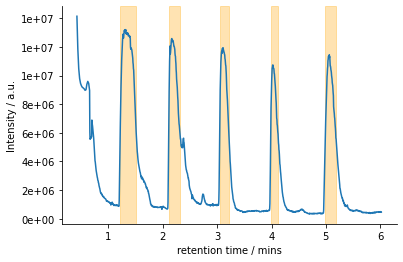

In [5]:
eng.config.chrom_peak_width = 0.6
eng.get_chrom_peaks(lb = 1, ub = 5.5) 
eng.add_chrom_peaks2() 
eng.plot_tic(peak_windows = True)

n.b. lowering the peakthresh may result in noise being recognised as a peak and thereby generating false data.
>start high e.g. 0.1 and lower as appropriate 

In [6]:
help(eng.update_config)

Help on method update_config in module unidec_modules.v3_SeqChrom:

update_config(minmz='', maxmz='', massub=10000, masslb=100000, peakthresh=0.01, subtype=2, subbuff=100, datanorm=0, numit=100, massbins=1, mzsig=0, startz=10, endz=100, zzsig=1, psig=1, beta=0, psfun=0, peaknorm=0, peakwindow=10, exnorm=0, numz=50, mtabsig=0.0, molig=0.0, mzbins=0.0, msig=0.0, smooth=0, reductionpercent=0.0, aggressive=0, rawflag=0, nativezub=1000.0, nativezlb=-1000.0, poolflag=2, noiseflag=0, linflag=2, isotopemode=0, baselineflag=1, orbimode=0, peakplotthresh=0.1, adductmass=1.007276467, intthresh=0) method of unidec_modules.v3_SeqChrom.SeqChrom instance
    [summary]
    
    Args:
        minmz (str, optional): [description]. Defaults to "".
        maxmz (str, optional): [description]. Defaults to "".
        massub (int, optional): [description]. Defaults to 10000.
        masslb (int, optional): [description]. Defaults to 100000.
        peakthresh (float, optional): [description]. Defaults to 0

In [7]:
eng.update_config(masslb = 5000, massub = 25000, peakthresh = 0.05, minmz=750)
eng.process_data()
eng.run_unidec()
eng.pick_peaks()
eng.integrate_all()

Failed Automatic Peak Width: list indices must be integers or slices, not tuple
[]
Execution Time: 0.36519039999999947
Execution Time: 5.5462466
Execution Time: 0.18760119999999958
Peak info saved to: C:\Users\cm19ljc\OneDrive - University of Leeds\DATA\AccMass\220107/processed\UniDec_Figures_and_Files\220107 A_340682_BE3_01_82111.d_extracts.txt


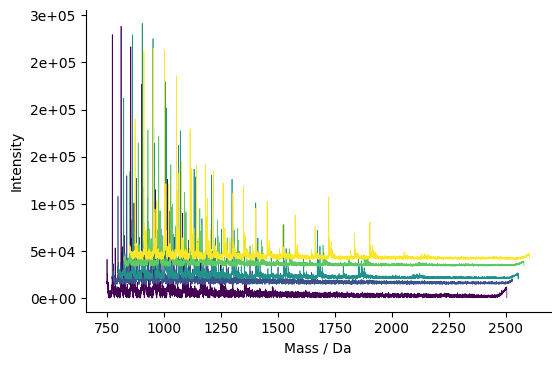

In [8]:
eng.plot_all(dtype = 'data2', combine = True, cmap = 'viridis')

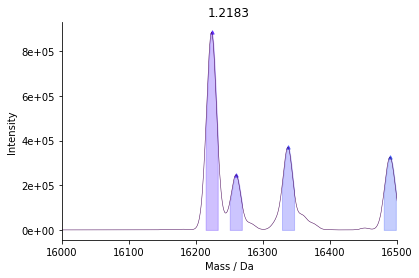

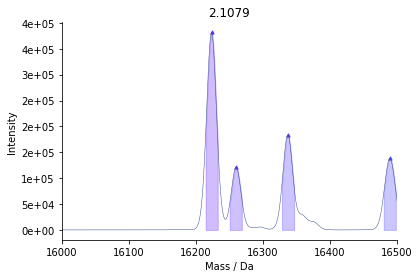

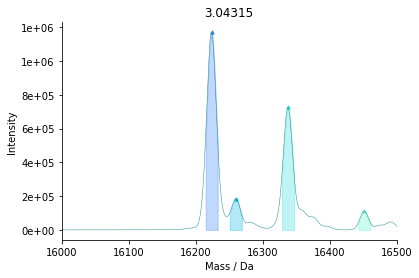

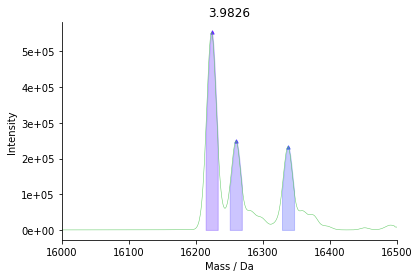

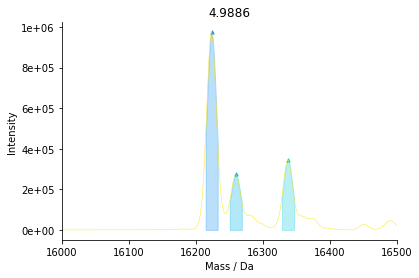

Help on method plot_all in module unidec_modules.v3_SeqChrom:

plot_all(dtype='massdat', show_ints=True, xlim=[], combine=False, cmap='Set1', export=False) method of unidec_modules.v3_SeqChrom.SeqChrom instance
    [Plots each spectra stored in Unichrom class]
    
    Args:
        dtype (str, optional): [description]. Defaults to 'massdat'.
        show_ints (bool, optional): [description]. Defaults to True.
        xlim (list, optional): [description]. Defaults to [].
        combine (bool, optional): [description]. Defaults to False.
        cmap (str, optional): [description]. Defaults to 'Set1'.
        export (bool, optional): [description]. Defaults to False.



In [19]:
eng.plot_all(dtype = 'massdat', combine = False, cmap = 'viridis', xlim = [16000, 16500])
help(eng.plot_all)

In [10]:
eng.upload_map(plate_map)

(  Reaction      Species  Concentration Units     Mass Reagent_Type Sequence
 0     PanZ         PanZ          100.0    uM  16223.0      Protein      NaN
 1     PanZ  PanZ-GVSEYG            NaN    uM  15623.0      Protein      NaN
 2     PanZ      PanZ-OH            NaN    uM  15029.0      Protein      NaN
 3     PanZ   PanZ-GVSEG            NaN   NaN  15459.0      Protein      NaN,
             Type Reaction Time  Species  Valid
 Well ID                                       
 1        Protein     PanZ   30      NaN   True
 2        Protein     PanZ   60      NaN   True
 3        Protein     PanZ   90      NaN   True
 4        Protein     PanZ  120      NaN   True
 5        Protein     PanZ  180      NaN   True)

In [11]:
eng.pmap

,Type,Reaction,Time,Species,Valid
Well ID,,,,,
1,Protein,PanZ,30,NaN,True
2,Protein,PanZ,60,NaN,True
3,Protein,PanZ,90,NaN,True
4,Protein,PanZ,120,NaN,True
5,Protein,PanZ,180,NaN,True


In [12]:
eng.speciesmap

,Reaction,Species,Concentration,Units,Mass,Reagent_Type,Sequence
0,PanZ,PanZ,100.0,uM,16223.0,Protein,NaN
1,PanZ,PanZ-GVSEYG,NaN,uM,15623.0,Protein,NaN
2,PanZ,PanZ-OH,NaN,uM,15029.0,Protein,NaN
3,PanZ,PanZ-GVSEG,NaN,NaN,15459.0,Protein,NaN


In [13]:
eng.process_maps(groupby = 'Reaction', variable = 'Species')

In [14]:
eng.pmap2

,Type,Reaction,Time,Species,Valid,PanZ,PanZ-GVSEG,PanZ-GVSEYG,PanZ-OH,Spectra
Well ID,,,,,,,,,,
1,Protein,PanZ,30,"[PanZ, PanZ-GVSEG, PanZ-GVSEYG, PanZ-OH]",True,"<PanZ(Reaction = PanZ, Species = PanZ, Concent...","<PanZ-GVSEG(Reaction = PanZ, Species = PanZ-GV...","<PanZ-GVSEYG(Reaction = PanZ, Species = PanZ-G...","<PanZ-OH(Reaction = PanZ, Species = PanZ-OH, C...",<metaunidec.mudstruct.Spectrum object at 0x000...
2,Protein,PanZ,60,"[PanZ, PanZ-GVSEG, PanZ-GVSEYG, PanZ-OH]",True,"<PanZ(Reaction = PanZ, Species = PanZ, Concent...","<PanZ-GVSEG(Reaction = PanZ, Species = PanZ-GV...","<PanZ-GVSEYG(Reaction = PanZ, Species = PanZ-G...","<PanZ-OH(Reaction = PanZ, Species = PanZ-OH, C...",<metaunidec.mudstruct.Spectrum object at 0x000...
3,Protein,PanZ,90,"[PanZ, PanZ-GVSEG, PanZ-GVSEYG, PanZ-OH]",True,"<PanZ(Reaction = PanZ, Species = PanZ, Concent...","<PanZ-GVSEG(Reaction = PanZ, Species = PanZ-GV...","<PanZ-GVSEYG(Reaction = PanZ, Species = PanZ-G...","<PanZ-OH(Reaction = PanZ, Species = PanZ-OH, C...",<metaunidec.mudstruct.Spectrum object at 0x000...
4,Protein,PanZ,120,"[PanZ, PanZ-GVSEG, PanZ-GVSEYG, PanZ-OH]",True,"<PanZ(Reaction = PanZ, Species = PanZ, Concent...","<PanZ-GVSEG(Reaction = PanZ, Species = PanZ-GV...","<PanZ-GVSEYG(Reaction = PanZ, Species = PanZ-G...","<PanZ-OH(Reaction = PanZ, Species = PanZ-OH, C...",<metaunidec.mudstruct.Spectrum object at 0x000...
5,Protein,PanZ,180,"[PanZ, PanZ-GVSEG, PanZ-GVSEYG, PanZ-OH]",True,"<PanZ(Reaction = PanZ, Species = PanZ, Concent...","<PanZ-GVSEG(Reaction = PanZ, Species = PanZ-GV...","<PanZ-GVSEYG(Reaction = PanZ, Species = PanZ-G...","<PanZ-OH(Reaction = PanZ, Species = PanZ-OH, C...",<metaunidec.mudstruct.Spectrum object at 0x000...


invalidate data using eng.invalidate()

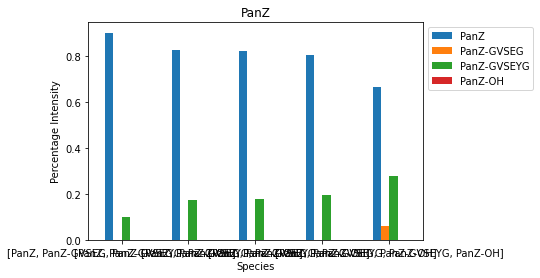

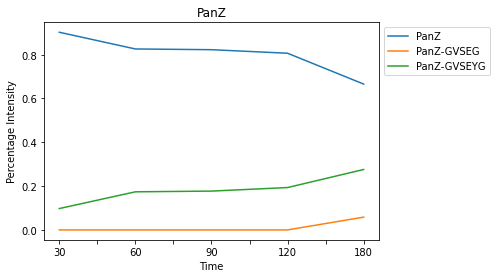

In [15]:
eng.peak_match(silent = True)
eng.normalise_peaks(silent = True)

eng.plot_data(plot_type='bar', groupby='Species')
eng.plot_data()

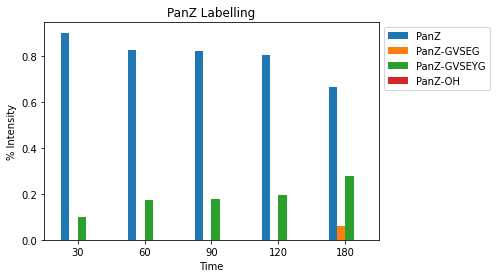

In [16]:
df = eng.data_df['PanZ']

df.plot.bar(rot = 0)
plt.legend(bbox_to_anchor=(1,1), loc="upper left")
plt.title('PanZ Labelling')
plt.ylabel("% Intensity")
plt.show()